In [2]:
import os 
os.chdir(r'D:\churn prediction')

In [11]:
import pandas as pd
from src.preprocessing import preprocessing_pipeline
from output.results_io import  load_results
from src.training_model import train_model_pipeline
from src.metrics import metrics_evaluation,validation_evalution
import xgboost  

In [12]:
train = pd.read_csv(r'D:\churn prediction\data\fe_train.csv')
test =  pd.read_csv(r'D:\churn prediction\data\fe_test.csv')

In [13]:
X_train = train.drop(columns='Churn')
y_train = train['Churn']

X_test = test.drop(columns='Churn')
y_test = test['Churn']

In [14]:
num_cols = X_train.select_dtypes([int,float]).columns
cat_cols = X_train.select_dtypes([object]).columns
tnf = preprocessing_pipeline(num_cols,cat_cols)

In [15]:
load_results()

,model,recall_test,precision_test,recall_train,precision_train
0,baseline_xgboost,0.831579,0.752381,0.853093,0.789976
1,RandomForestClassifier,0.873684,0.988095,0.863402,0.988201
2,GradientBoostingClassifier,0.873684,0.988095,0.868557,1.000000
3,XGBClassifier,0.873684,0.976471,0.863402,0.991124


In [16]:
xgb = xgboost.XGBClassifier(max_depth=3,eta=0.09,scale_pos_weight=4.5,n_estimators=100,random_state=42)
xgb_model = train_model_pipeline(xgb,tnf,X_train,y_train)

Train metrics
recall: 0.863
precision:0.991
 
Test metrics
recall: 0.874
precision:0.976


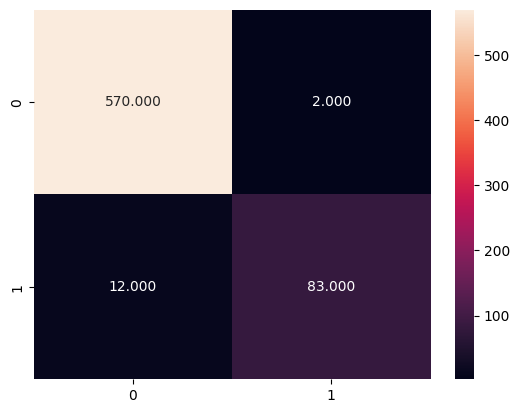

In [17]:
metrics_evaluation(xgb_model,X_train,X_test,y_train,y_test)

In [19]:
validation_evalution(xgb_model,'recall',X_train,y_train)

np.float64(0.8582084582084581)